# To predict the cost of the food served by the restaurants across different cities in India. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Restaurantdata_Train.csv',encoding='latin1')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
#Importing the dataset

In [4]:
df.shape

(12690, 9)

In [5]:
#Checking the dataset values-There are 12690 rows and 9 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
# All the columns are object type except for cost and title, which are integer datatype
#'CITY','LOCALITY','RATING','VOTES' has null values which has been filled below with mode with the first index

In [8]:
cols=['CITY','LOCALITY','RATING','VOTES']
df[cols]=df[cols].fillna(df.mode().iloc[0])


In [9]:
#'CITY','LOCALITY','RATING','VOTES' has null values which has been filled below with mode with the first index

In [10]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [11]:
#There are no null values

<AxesSubplot:>

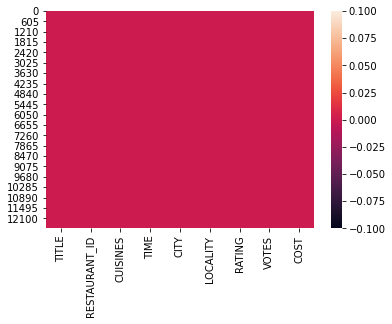

In [12]:
sns.heatmap(df.isnull())

In [13]:
#Graphically representing the null values through heat map
# Right now, no null values exists

In [14]:
#Changing the dataset into numeric for detailed insight

In [15]:
df[['Cuisine1','Cuisine2','Cuisine3']] = df['CUISINES'].str.split(',',n=2, expand=True)

In [16]:
#Splitting the cusine into 3 columns for detailed insight as 'Cuisine1','Cuisine2','Cuisine3'

In [17]:
df['VOTES']=df['VOTES'].str.slice(stop=-5).astype(int)
df['VOTES'].head()

0     49
1     30
2    221
3     24
4    165
Name: VOTES, dtype: int32

In [18]:
#Removing the word votes and converting the datatype to int

In [19]:
df[['Dining','Dining2']]=df['TITLE'].str.split(',',n=2,expand=True)


In [20]:
#Splitting the column-'TITLE' into two columns as 'Dining','Dining2'

In [21]:
df.head(50)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Cuisine1,Cuisine2,Cuisine3,Dining,Dining2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian,CASUAL DINING,None
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,North Indian,Chinese,"Biryani, Hyderabadi",CASUAL DINING,None
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,Tibetan,Chinese,None,QUICK BITES,None
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,Desserts,None,None,DESSERT PARLOR,None
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon  12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550,800,North Indian,Chinese,"Seafood, Biryani",CASUAL DINING,None
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon  11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509,600,Cafe,Chinese,"Pizza, North Indian, Burger",CAFÉ,None
7,MICROBREWERY,1249,Bar Food,1pm  1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612,1600,Bar Food,None,None,MICROBREWERY,None
8,QUICK BITES,7062,"South Indian, North Indian",7am  10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101,300,South Indian,North Indian,None,QUICK BITES,None
9,QUICK BITES,10109,North Indian,"11am  2pm, 4pm  10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219,200,North Indian,None,None,QUICK BITES,None


In [22]:
#The new dataset

In [23]:
df.shape

(12690, 14)

In [24]:
# the new dataset has 12690 rows and 14 columns

In [25]:
df.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY                 0
LOCALITY             0
RATING               0
VOTES                0
COST                 0
Cuisine1             0
Cuisine2          3062
Cuisine3          6999
Dining               0
Dining2          11208
dtype: int64

In [26]:
#The new dataset has following null values
#Cuisine2-3062,Cuisine3-6999 & Dining2-11208

In [27]:
df['Cuisine2']=df['Cuisine2'].fillna(df['Cuisine2'].mode()[0])

In [28]:
df['Cuisine3']=df['Cuisine3'].fillna(df['Cuisine3'].mode()[0])

In [29]:
df['Dining']=df[['Dining']].replace('None','QUICK BITES')


In [30]:
#Filling the null values of Cuisine2 & Cuisine3 and 22 row of the dining with QUICK BITES as it is roll shop

In [31]:
cols=['TIME','CITY','CUISINES','Dining2','TITLE']
df=df.drop(cols,axis=1)

In [32]:
#Dropping the main columns as we have extracted out of it
#Dining2-dropping the column as it has mostly null values

In [33]:
df.head()

,RESTAURANT_ID,LOCALITY,RATING,VOTES,COST,Cuisine1,Cuisine2,Cuisine3,Dining
0,9438,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian,CASUAL DINING
1,13198,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese,CASUAL DINING
2,10915,Saligramam,3.8,221,800,North Indian,Chinese,"Biryani, Hyderabadi",CASUAL DINING
3,6346,Bandra West,4.1,24,800,Tibetan,Chinese,Chinese,QUICK BITES
4,15387,Lower Parel,3.8,165,300,Desserts,Chinese,Chinese,DESSERT PARLOR


In [34]:
df.isnull().sum()

RESTAURANT_ID    0
LOCALITY         0
RATING           0
VOTES            0
COST             0
Cuisine1         0
Cuisine2         0
Cuisine3         0
Dining           0
dtype: int64

In [35]:
#Cross checking if there is any null values or not

In [36]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) +' : '+str(df[column].unique()))
        print(df[column].value_counts())
        print('***************************************************************************')
        print('\n')

LOCALITY : ['Dombivali East' 'Ramapuram' 'Saligramam' ... 'Market Road'
 'Near Perambur' 'Near Malviya Nagar']
Gachibowli                              264
Indiranagar                             138
Edappally                               122
Kakkanad                                121
HSR                                     120
                                       ... 
Srinivasa Nagar Colony A S Rao Nagar      1
Gachibowli - Miyapur Road                 1
Perambakkam Medavakkam                    1
Infantry Road                             1
Sector 8                                  1
Name: LOCALITY, Length: 1416, dtype: int64
***************************************************************************


RATING : ['3.6' '4.2' '3.8' '4.1' '4.0' '4.3' '3.9' '3.3' '3.4' '-' '4.5' '3.5'
 '4.4' '2.7' '3.7' '4.7' 'NEW' '3.1' '2.5' '4.6' '2.8' '3.0' '3.2' '2.6'
 '2.9' '4.9' '4.8' '2.4' '2.3' '2.0' '2.1' '2.2']
3.9    1240
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     7

In [37]:
#checking the unique values with its count

In [38]:
df['COST'].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
le= LabelEncoder()
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])


In [42]:
df['COST'].unique()

array([36, 43, 28, 14, 24, 45, 11, 30, 19, 41, 17, 21, 20, 26, 32, 12, 53,
       34,  5, 29, 58, 49,  9, 25, 68, 27, 31, 39, 10, 54, 22,  1, 51, 48,
       40,  2, 55, 77,  4, 66, 71, 42, 72, 61,  6, 76, 57, 47, 63, 59, 78,
       85, 44, 75, 70, 35, 60,  7, 83, 65, 79, 81, 33, 84, 69, 15, 67, 56,
       64, 37,  0, 46, 50, 80,  8, 74, 73, 62, 23, 82, 13, 18, 52, 16, 38,
        3], dtype=int64)

In [43]:
#Checking the unique values of cost post conversion through LabelEncoder

In [44]:
df.head()

,RESTAURANT_ID,LOCALITY,RATING,VOTES,COST,Cuisine1,Cuisine2,Cuisine3,Dining
0,7196,285,17,45,36,59,32,1123,4
1,10075,1046,23,26,43,6,60,889,4
2,8349,1101,19,217,28,72,23,202,4
3,4876,136,22,20,28,100,23,304,20
4,11747,620,19,161,14,28,23,304,8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   RESTAURANT_ID  12690 non-null  int64
 1   LOCALITY       12690 non-null  int32
 2   RATING         12690 non-null  int32
 3   VOTES          12690 non-null  int64
 4   COST           12690 non-null  int64
 5   Cuisine1       12690 non-null  int32
 6   Cuisine2       12690 non-null  int32
 7   Cuisine3       12690 non-null  int32
 8   Dining         12690 non-null  int32
dtypes: int32(6), int64(3)
memory usage: 595.0 KB


In [46]:
dcorr=df.corr()
dcorr

,RESTAURANT_ID,LOCALITY,RATING,VOTES,COST,Cuisine1,Cuisine2,Cuisine3,Dining
RESTAURANT_ID,1.000000,-0.004197,0.032382,0.016111,0.044781,0.047982,0.027101,-0.006786,-0.000324
LOCALITY,-0.004197,1.000000,-0.023361,-0.042406,-0.015322,0.019262,0.007060,-0.008416,0.028005
RATING,0.032382,-0.023361,1.000000,0.310158,0.264332,-0.045451,0.005938,0.087016,-0.040662
VOTES,0.016111,-0.042406,0.310158,1.000000,0.419040,-0.033970,0.059598,0.148738,-0.213178
COST,0.044781,-0.015322,0.264332,0.419040,1.000000,-0.054690,0.075189,0.177881,-0.372900
Cuisine1,0.047982,0.019262,-0.045451,-0.033970,-0.054690,1.000000,-0.019474,-0.080076,0.208093
Cuisine2,0.027101,0.007060,0.005938,0.059598,0.075189,-0.019474,1.000000,0.059446,-0.003936
Cuisine3,-0.006786,-0.008416,0.087016,0.148738,0.177881,-0.080076,0.059446,1.000000,-0.110201
Dining,-0.000324,0.028005,-0.040662,-0.213178,-0.372900,0.208093,-0.003936,-0.110201,1.000000


<AxesSubplot:>

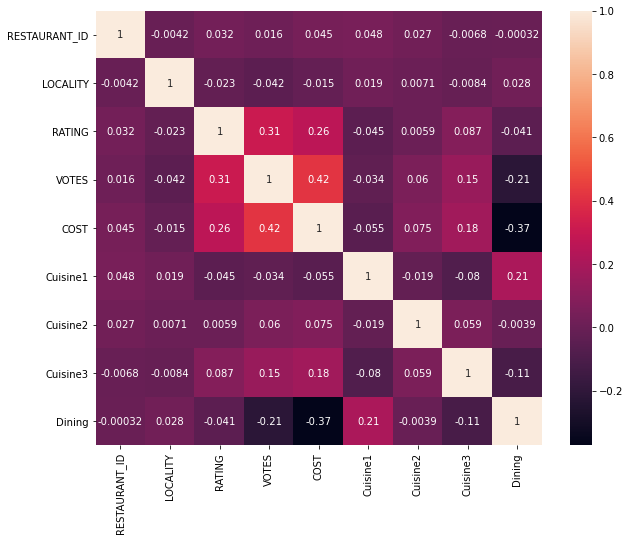

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(dcorr,annot=True)

In [48]:
#Cost has good correlation with the following columns:-
# Rating - 0.26
#Votes -0.42

#Cost has negilible correlation with the following columns which we will drop:-
#Locality - -0.015322
#Cuisine1 - -0.054690
#Cuisine2 - 0.075189

In [49]:
col =['LOCALITY','Cuisine1','Cuisine2']
df_new=df.drop(col,axis=1)

In [50]:
df_new.head()

,RESTAURANT_ID,RATING,VOTES,COST,Cuisine3,Dining
0,7196,17,45,36,1123,4
1,10075,23,26,43,889,4
2,8349,19,217,28,202,4
3,4876,22,20,28,304,20
4,11747,19,161,14,304,8


In [51]:
df_cor=df_new.corr()
df_cor

,RESTAURANT_ID,RATING,VOTES,COST,Cuisine3,Dining
RESTAURANT_ID,1.000000,0.032382,0.016111,0.044781,-0.006786,-0.000324
RATING,0.032382,1.000000,0.310158,0.264332,0.087016,-0.040662
VOTES,0.016111,0.310158,1.000000,0.419040,0.148738,-0.213178
COST,0.044781,0.264332,0.419040,1.000000,0.177881,-0.372900
Cuisine3,-0.006786,0.087016,0.148738,0.177881,1.000000,-0.110201
Dining,-0.000324,-0.040662,-0.213178,-0.372900,-0.110201,1.000000


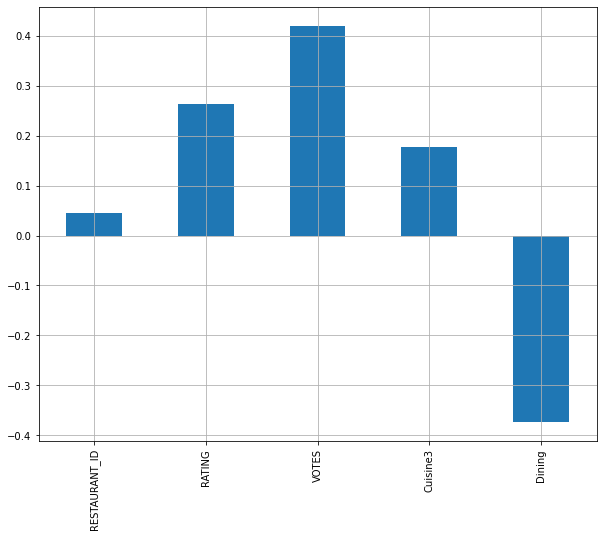

In [52]:
plt.figure(figsize=(10,8))
df_new.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)
plt.show()

In [53]:
#Cost has got good correlation with the column rating, votes and cuisine3 and negative good correlation with dining

Visualization

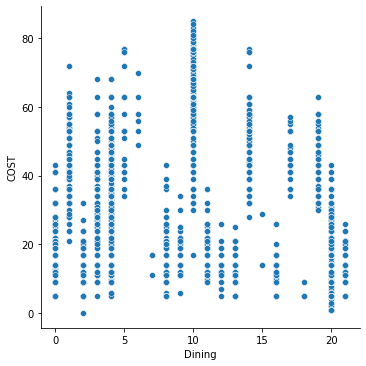

In [54]:
sns.relplot(x='Dining',y='COST',data=df_new)

In [55]:
# The relationship is more or less uniformly scattered
#with increase in cost the density of dining is optimum

<AxesSubplot:xlabel='Dining', ylabel='count'>

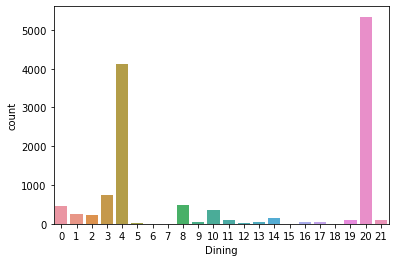

In [56]:
sns.countplot(x='Dining',data=df_new)

In [57]:
#Maximum count is for 20th(QUICK BITES) and 4th column(CASUAL DINING)

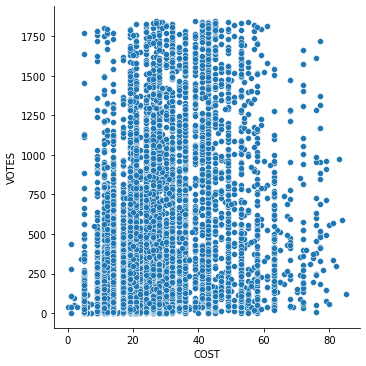

In [58]:
sns.relplot(x='COST',y='VOTES',data=df_new)

In [59]:
#it signifies the both the column has very good correlation
#Maximum votes lies within the cost range(20-40)

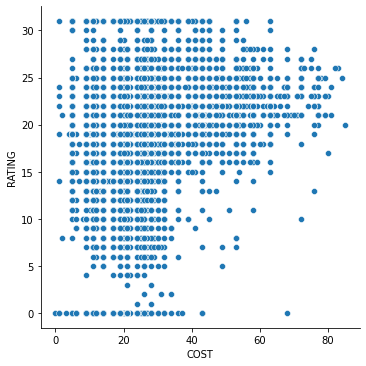

In [60]:
sns.relplot(x='COST',y='RATING',data=df_new)

In [61]:
#maximum rating lies within the range(15-35)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f917252670>],
 'cmeans': <matplotlib.collections.LineCollection at 0x1f9172524c0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f917252520>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f917252b20>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f917260160>}

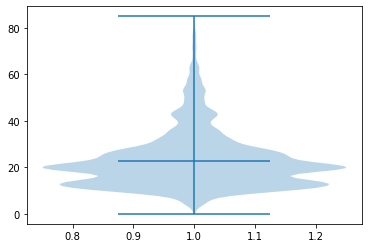

In [62]:
plt.violinplot(df_new['COST'],showmeans=True)

In [63]:
#maximum density lies within 15 - 25

In [64]:
df_new.describe()

,RESTAURANT_ID,RATING,VOTES,COST,Cuisine3,Dining
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,5937.772183,18.795902,307.640662,22.934437,491.910087,11.363199
std,3429.158561,6.181352,404.080554,12.229288,364.374505,7.975161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2967.250000,16.000000,40.000000,14.000000,304.000000,4.000000
50%,5930.500000,19.000000,128.000000,21.000000,304.000000,9.000000
75%,8921.750000,22.000000,401.000000,28.000000,567.000000,20.000000
max,11891.000000,31.000000,1846.000000,85.000000,1569.000000,21.000000


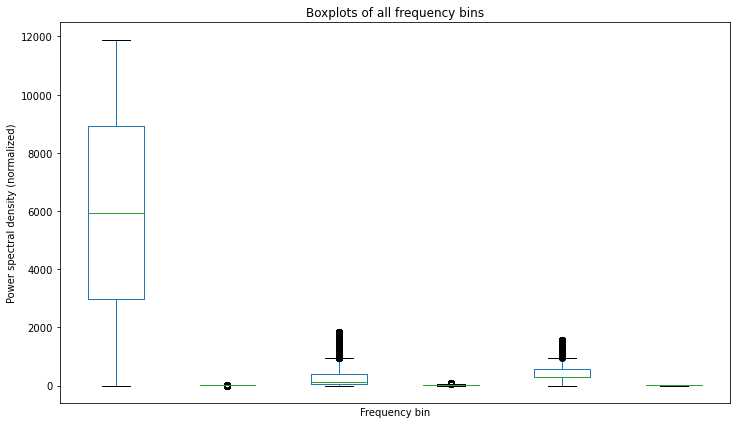

In [65]:
df_new.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

In [66]:
#outliers are present in certain columms

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z.shape

(12690, 6)

In [68]:
dfnew=df_new[(z<3).all(axis=1)]
print(dfnew.shape)

(11641, 6)


In [69]:
percentageloss=(((12690-11641)/12690)*100)
percentageloss

8.26635145784082

In [70]:
#removing the outliers and through zscore and percentage loss in data is little high 8.2

In [71]:
df_new.head()

,RESTAURANT_ID,RATING,VOTES,COST,Cuisine3,Dining
0,7196,17,45,36,1123,4
1,10075,23,26,43,889,4
2,8349,19,217,28,202,4
3,4876,22,20,28,304,20
4,11747,19,161,14,304,8


In [72]:
#this is a small dataset where 8.26 column lost is quite high, so we would skew the data and standardize the dataset
#Splitting the dataset into x and y

In [73]:
x=df.drop('COST',axis=1)
x.head()

,RESTAURANT_ID,LOCALITY,RATING,VOTES,Cuisine1,Cuisine2,Cuisine3,Dining
0,7196,285,17,45,59,32,1123,4
1,10075,1046,23,26,6,60,889,4
2,8349,1101,19,217,72,23,202,4
3,4876,136,22,20,100,23,304,20
4,11747,620,19,161,28,23,304,8


In [74]:
y=df['COST']
y.head()

0    36
1    43
2    28
3    28
4    14
Name: COST, dtype: int64

In [75]:
df['COST'].unique()

array([36, 43, 28, 14, 24, 45, 11, 30, 19, 41, 17, 21, 20, 26, 32, 12, 53,
       34,  5, 29, 58, 49,  9, 25, 68, 27, 31, 39, 10, 54, 22,  1, 51, 48,
       40,  2, 55, 77,  4, 66, 71, 42, 72, 61,  6, 76, 57, 47, 63, 59, 78,
       85, 44, 75, 70, 35, 60,  7, 83, 65, 79, 81, 33, 84, 69, 15, 67, 56,
       64, 37,  0, 46, 50, 80,  8, 74, 73, 62, 23, 82, 13, 18, 52, 16, 38,
        3], dtype=int64)

In [76]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
x=MMS.fit_transform(x)
x

array([[0.60516357, 0.20141343, 0.5483871 , ..., 0.32989691, 0.71574251,
        0.19047619],
       [0.84727946, 0.73922261, 0.74193548, ..., 0.6185567 , 0.56660293,
        0.19047619],
       [0.70212766, 0.77809187, 0.61290323, ..., 0.2371134 , 0.12874442,
        0.19047619],
       ...,
       [0.71634009, 0.94840989, 0.67741935, ..., 0.25773196, 0.0471638 ,
        0.66666667],
       [0.39677067, 0.4459364 , 0.51612903, ..., 0.86597938, 0.28680688,
        0.19047619],
       [0.41552435, 0.94204947, 0.48387097, ..., 0.2371134 , 0.19375398,
        0.19047619]])

In [77]:
#scaling the dataset

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [79]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    MB=MultinomialNB()
    MB.fit(x_train,y_train)
    y_pred=MB.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 15.130023640661939 found on random state 94


In [80]:
#Best random state is 94 and training the model with random state 94

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=94)

In [82]:
model=[SVC(kernel='rbf'),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),MultinomialNB()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm)*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(cross_val_score(m,x,y,cv=5).mean()*100)
    print('**********************************************')
    print('\n')

Accuracy score of SVC() is:
16.86367218282112
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        89
          11       0.15      0.04      0.07       208
          12       0.00      0.00      0.00       144
          13       0.00      0.00      0.00         1
          14       0.23      0.74      0.35       365
          17       0.00      0.00      0.00       102
          19       0.17      0.09      0.12       266
          20       0.00      0.00      0.00        80
          21       0.12      0.24      0.16       280
          22       0.00      0.00      0.00        39
          24       0.08      0.07      0.07       150
          25       0.00

11.993695823483057
**********************************************


Accuracy score of AdaBoostClassifier() is:
15.957446808510639
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        89
          11       0.00      0.00      0.00       208
          12       0.00      0.00      0.00       144
          13       0.00      0.00      0.00         1
          14       0.21      0.79      0.33       365
          17       0.00      0.00      0.00       102
          19       0.00      0.00      0.00       266
          20       0.00      0.00      0.00        80
          21       0.10      0.42      0.16       280
          22       0.00      0.00      0.00    

In [83]:
#SVC gives the best score of 16 percent

In [84]:
from sklearn.model_selection import GridSearchCV
parameters=({'C':[1,10],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']})
svc=SVC()


clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [85]:
pred=clf.predict(x_test)
print("Final accuracy :",accuracy_score(y_test,pred)*100)

Final accuracy : 17.61229314420804


In [86]:
import joblib
filename='model.pkl'
joblib.dump(clf,open(filename,'wb'))